In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,6)

In [2]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi * 50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

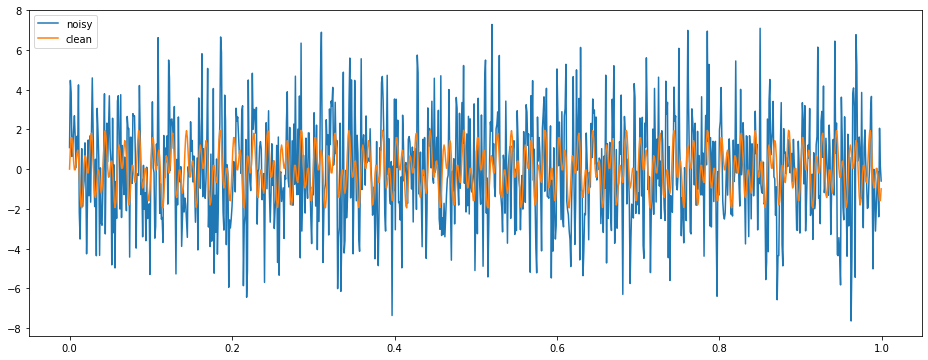

In [3]:
plt.plot(t,f, label = "noisy")
plt.plot(t,f_clean, label = "clean")
plt.legend()

/home/mayukh/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


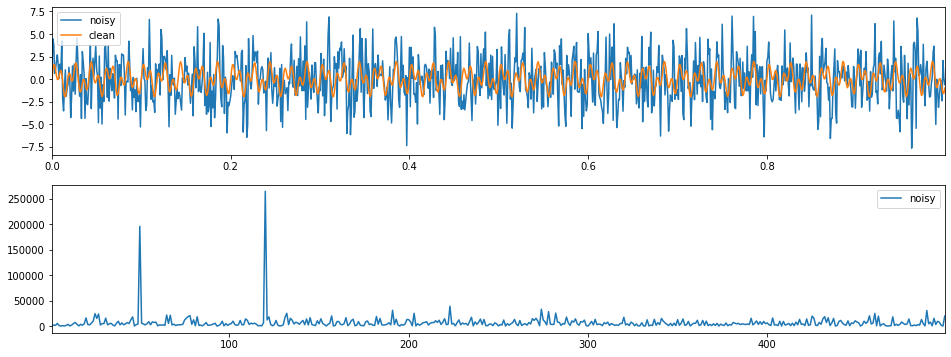

In [12]:
## fft

n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat*np.conj(fhat)
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t, f, label = "noisy")
plt.plot(t, f_clean, label = "clean")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], label = 'noisy')
plt.xlim(freq[L[0]], freq[L[-1]])

plt.legend()

In [15]:
indices = PSD>100
PSDclean = PSD*indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

/home/mayukh/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


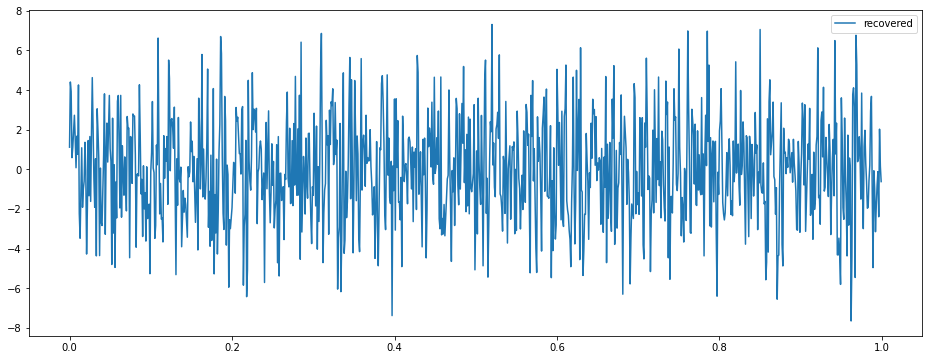

In [26]:
plt.plot(t, ffilt, label = "recovered")
plt.legend()

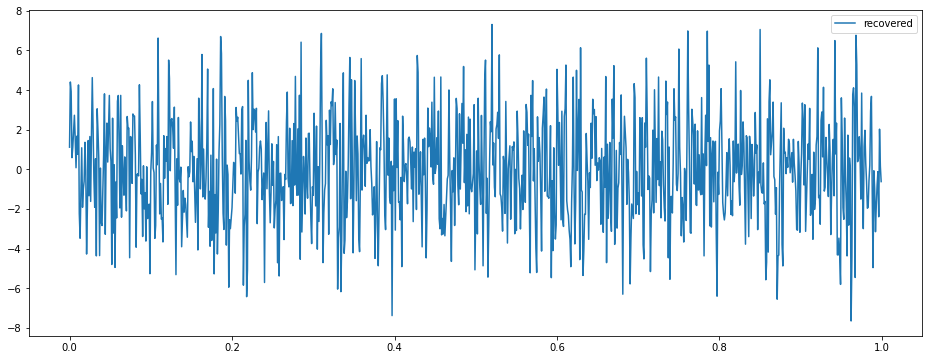

In [29]:
plt.plot(t, np.real(ffilt), label = "recovered")
plt.legend()

In [35]:
(f - np.real(ffilt)).mean()

2.7755575615628915e-18